# Importing modules


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [7]:
# Connecting dataset
df = pd.read_csv('tweet_data.csv')
df.head()

,textID,tweet_text,sentiment
0,1956967666,Layin n bed with a headache ughhhh...waitin o...,negative
1,1956967696,Funeral ceremony...gloomy friday...,negative
2,1956967789,wants to hang out with friends SOON!,positive
3,1956968477,Re-pinging @ghostridah14: why didn't you go to...,negative
4,1956968636,Hmmm. http://www.djhero.com/ is down,negative


In [8]:
# Total Tweets
len(df)

18727

In [9]:
# Random Tweets
df.sample(10)

,textID,tweet_text,sentiment
14931,1752193474,@joannarobbins You are 'spot on'...I wouldn't ...,positive
4295,1962390297,@abhorrentbm lame. you should have said hello!,negative
13635,1751178006,@BreeOlson9 I see your date is showing you a g...,positive
1659,1958059978,Is feeling like he has a bad flu. Yes. Bad. Flu.,negative
18097,1753681449,"@mileycyrus i think it's fun, you gotta hide, ...",positive
739,1957331051,#DepecheMode concert next week cancelled Alte...,negative
11528,1694879883,@tanmaygolhar thanks..,positive
7513,1965069095,@myrewyn oh no! Poor thing keep us posted.,negative
628,1957268164,very very bad headache that is getting worse b...,negative
14938,1752193787,took the most amazing power nap ever. now its ...,positive


In [10]:
# Checking the tweet sentiments
tweet = df.iloc[4052]
print('Tweet: {}'.format(tweet['tweet_text']), '\n\nTweet Sentiment: {}'.format(tweet['sentiment']))

Tweet: @stacywillert yeah that was me yesterday after i found out the house i want is sold, my bank effed me over and then the car accident 

Tweet Sentiment: negative


## Dataset Visualization

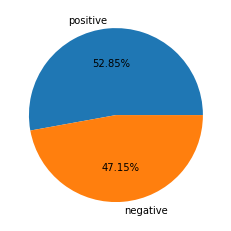

In [11]:
# Checking the percantage(%) of Positive and Negative Tweets
sentiment_count = df['sentiment'].value_counts()
plt.pie(sentiment_count, labels=sentiment_count.index, autopct='%.2f%%')
plt.show()

In [12]:
# Count of Positive and Negative
print('Negative Count:', df[df['sentiment'] == 'negative'].count()[0])
print('Positive Count:', df[df['sentiment'] == 'positive'].count()[0])

Negative Count: 8830
Positive Count: 9897


### WordCloud

In [13]:
from wordcloud import WordCloud

In [14]:
# Function to generate word cloud for positive or negative tweets
def generate_word_cloud(tweet_type='positive'):
    tweets = df[df['sentiment'] == tweet_type]
    txt = ''.join(tweet.lower() for tweet in tweets['tweet_text'])
    wordcloud = WordCloud().generate(txt)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()
    

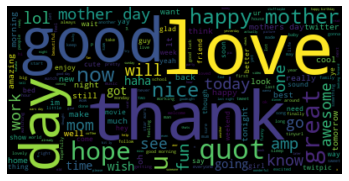

In [15]:
# Most words in positive tweets
generate_word_cloud()

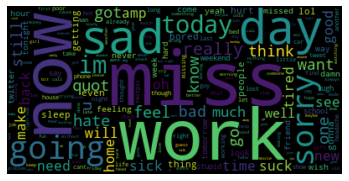

In [16]:
# Most words in negative tweets
generate_word_cloud(tweet_type='negative')

## Text Normalization

In [17]:
import re

In [18]:
tweet = 'RT @tss I love this! 😎 https://thesumitshrestha.xyz #NLP #fun'

In [19]:
# Replacing RT with default value
def replace_retweet(tweet, default_value=''):
    tweet = re.sub('RT\s+', default_value, tweet)
    return tweet

In [20]:
print('Processed tweet: {}'.format(replace_retweet(tweet)))

Processed tweet: @tss I love this! 😎 https://thesumitshrestha.xyz #NLP #fun


In [21]:
# Replacing User with default value
def replace_user(tweet, default_value='user'):
    tweet = re.sub('\B@\w+', default_value, tweet)
    return tweet

In [22]:
print('Processed tweet: {}'.format(replace_user(tweet)))

Processed tweet: RT user I love this! 😎 https://thesumitshrestha.xyz #NLP #fun


In [23]:
# Replacing emoji with text
import emoji

In [24]:
def demoji(tweet):
    tweet = emoji.demojize(tweet)
    return tweet

In [25]:
print('Processed tweet: {}'.format(demoji(tweet)))

Processed tweet: RT @tss I love this! :smiling_face_with_sunglasses: https://thesumitshrestha.xyz #NLP #fun


In [26]:
# Replacing url with default value
def replace_url(tweet, default_value=''):
    tweet = re.sub('(http|https):\/\/\S+', default_value, tweet)
    return tweet

In [27]:
print('Processed tweet: {}'.format(replace_url(tweet)))

Processed tweet: RT @tss I love this! 😎  #NLP #fun


In [28]:
# Replacing hashtag with default value
def replace_hashtag(tweet, default_value=''):
    tweet = re.sub('#+', default_value, tweet)
    return tweet

In [29]:
print('Processed tweet: {}'.format(replace_hashtag(tweet)))

Processed tweet: RT @tss I love this! 😎 https://thesumitshrestha.xyz NLP fun


In [30]:
new_tweet = "SOOOOOO FUN, I won't forget this!!!!!"

In [31]:
# To lowercase
def to_lowercase(tweet):
    tweet = tweet.lower()
    return tweet

In [32]:
print('Processed tweet: {}'.format(to_lowercase(new_tweet)))

Processed tweet: soooooo fun, i won't forget this!!!!!


In [33]:
# Word Repetition
def word_repetition(tweet):
    tweet = re.sub(r'(.)\1+',r'\1', tweet)
    return tweet

In [34]:
print('Processed tweet: {}'.format(word_repetition(new_tweet)))

Processed tweet: SO FUN, I won't forget this!


In [35]:
# Punctuation Repetition
def punct_repetition(tweet, default_value=''):
    tweet = re.sub(r'[\?\!\.]+(?=[\?\.\!])',default_value, tweet)
    return tweet

In [36]:
print('Processed tweet: {}'.format(punct_repetition(new_tweet)))

Processed tweet: SOOOOOO FUN, I won't forget this!


In [37]:
# Contractions like won't, don't I'm'
import contractions

In [38]:
# Checking the contractions list
print(contractions.contractions_dict)

{"I'm": 'I am', "I'm'a": 'I am about to', "I'm'o": 'I am going to', "I've": 'I have', "I'll": 'I will', "I'll've": 'I will have', "I'd": 'I would', "I'd've": 'I would have', 'Whatcha': 'What are you', "amn't": 'am not', "ain't": 'are not', "aren't": 'are not', "'cause": 'because', "can't": 'cannot', "can't've": 'cannot have', "could've": 'could have', "couldn't": 'could not', "couldn't've": 'could not have', "daren't": 'dare not', "daresn't": 'dare not', "dasn't": 'dare not', "didn't": 'did not', 'didn’t': 'did not', "don't": 'do not', 'don’t': 'do not', "doesn't": 'does not', "e'er": 'ever', "everyone's": 'everyone is', 'finna': 'fixing to', 'gimme': 'give me', "gon't": 'go not', 'gonna': 'going to', 'gotta': 'got to', "hadn't": 'had not', "hadn't've": 'had not have', "hasn't": 'has not', "haven't": 'have not', "he've": 'he have', "he's": 'he is', "he'll": 'he will', "he'll've": 'he will have', "he'd": 'he would', "he'd've": 'he would have', "here's": 'here is', "how're": 'how are', "

In [39]:
def fix_contractions(tweet):
    tweet = contractions.fix(tweet)
    return tweet

In [40]:
print('Processed tweet: {}'.format(fix_contractions(new_tweet)))

Processed tweet: SOOOOOO FUN, I will not forget this!!!!!


## Tokenization

In [41]:
import nltk
from nltk.tokenize import word_tokenize
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/thesumitshrestha/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [42]:
# Tweet to tokenize
tweet = 'these are 5 different words!'

In [43]:
# Tokenize Function
def tokenize(tweet):
    tweet = word_tokenize(tweet)
    return tweet

In [44]:
# Checking the datatype after tweet has been tokenized
print(type(tokenize(tweet)))
print('Tweet tokens: {}'.format(tokenize(tweet)))

<class 'list'>
Tweet tokens: ['these', 'are', '5', 'different', 'words', '!']



### Stop Words

In [45]:
import string

In [46]:
# Checking the punctuation
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [47]:
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/thesumitshrestha/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [48]:
# Set of english stopwords
stop_words = set(stopwords.words('english'))
print(stop_words)

{'an', 'm', 'you', 'their', 'whom', 'itself', 'wouldn', 'because', 'our', 'some', 'her', "haven't", "weren't", 'couldn', 'which', 'nor', 'has', 'through', 'should', 'from', 'that', 'himself', 'of', 'at', 'and', 'haven', 'ma', 'needn', 'can', 'when', 'them', 'to', 'why', 'while', 'on', "shan't", 'there', 'here', 'few', 'ourselves', 'no', 'then', 'down', 'doing', 'too', 'isn', 'how', 'wasn', 'where', 'do', 'about', 's', 'will', 'being', 'be', 'it', 'having', 'now', 'these', 'same', 'mustn', 'both', 'did', 'ours', 'this', "couldn't", 'hasn', "you're", 'against', 'for', 'not', "that'll", 'have', 'aren', 'yours', 'won', 'yourselves', 'during', 'under', 'theirs', 'into', 'is', "you've", 'the', 'all', 'if', 'again', "mightn't", 'mightn', 'most', 'between', 'had', 'hers', "isn't", "you'd", 'with', 'didn', 'they', 'shouldn', 'as', 'he', 'who', 'were', 'so', "wouldn't", 'does', "doesn't", "she's", 'hadn', 'ain', 'off', "won't", 'before', 'above', 'she', 'don', 'been', 'doesn', "don't", 'y', 'jus

In [49]:
# Removing not from the dataset as we need it on our project
stop_words.discard('not')
print(stop_words)

{'an', 'm', 'you', 'their', 'whom', 'itself', 'wouldn', 'because', 'our', 'some', 'her', "haven't", "weren't", 'couldn', 'which', 'nor', 'has', 'through', 'should', 'from', 'that', 'himself', 'of', 'at', 'and', 'haven', 'ma', 'needn', 'can', 'when', 'them', 'to', 'why', 'while', 'on', "shan't", 'there', 'here', 'few', 'ourselves', 'no', 'then', 'down', 'doing', 'too', 'isn', 'how', 'wasn', 'where', 'do', 'about', 's', 'will', 'being', 'be', 'it', 'having', 'now', 'these', 'same', 'mustn', 'both', 'did', 'ours', 'this', "couldn't", 'hasn', "you're", 'against', 'for', "that'll", 'have', 'aren', 'yours', 'won', 'yourselves', 'during', 'under', 'theirs', 'into', 'is', "you've", 'the', 'all', 'if', 'again', "mightn't", 'mightn', 'most', 'between', 'had', 'hers', "isn't", "you'd", 'with', 'didn', 'they', 'shouldn', 'as', 'he', 'who', 'were', 'so', "wouldn't", 'does', "doesn't", "she's", 'hadn', 'ain', 'off', "won't", 'before', 'above', 'she', 'don', 'been', 'doesn', "don't", 'y', 'just', "mu

In [50]:
# Custom tokenize function

def custom_tokenize(tweet, keep_punct = False, keep_alnum = False, keep_stop = False):
    token_list = word_tokenize(tweet)
    
    if not keep_punct:
        token_list = [token for token in token_list if token not in string.punctuation]
        
    if not keep_alnum:
        token_list = [token for token in token_list if token.isalpha()]
        
    if not keep_stop:
        stop_words = set(stopwords.words('english'))
        stop_words.discard('not')
        token_list = [token for token in token_list if not token in stop_words]
        
    return token_list

In [51]:
print('Tweet tokens: {}'.format(custom_tokenize(tweet, keep_punct=True, keep_alnum=True, keep_stop=True)))

Tweet tokens: ['these', 'are', '5', 'different', 'words', '!']


In [52]:
print('Tweet tokens: {}'.format(custom_tokenize(tweet, keep_stop=True)))

Tweet tokens: ['these', 'are', 'different', 'words']


In [53]:
print('Tweet tokens: {}'.format(custom_tokenize(tweet, keep_alnum=True)))

Tweet tokens: ['5', 'different', 'words']


### Stemming

In [54]:
# Import libraries for stemming
from nltk.stem import PorterStemmer
from nltk.stem import LancasterStemmer
from nltk.stem.snowball import SnowballStemmer

In [55]:
# Token of list to stem
tokens = ['manager', 'management', 'managing']

In [56]:
porter_stemmer = PorterStemmer()
lancaster_stemmer = LancasterStemmer()
snowball_stemmer = SnowballStemmer('english')

In [57]:
# Function to stem tokens
def stem_tokens(tokens, stemmer):
    token_list = []
    for token in tokens:
        token_list.append(stemmer.stem(token))
        
    return token_list

In [58]:
print('Porter stems:',stem_tokens(tokens, porter_stemmer))
print('Lancaster stems:',stem_tokens(tokens, lancaster_stemmer))
print('Snowball stems:',stem_tokens(tokens, snowball_stemmer))

Porter stems: ['manag', 'manag', 'manag']
Lancaster stems: ['man', 'man', 'man']
Snowball stems: ['manag', 'manag', 'manag']


In [59]:
# Different Token List
tokens = ['international', 'companies', 'had', 'interns']

In [60]:
print('Porter stems:',stem_tokens(tokens, porter_stemmer))
print('Lancaster stems:',stem_tokens(tokens, lancaster_stemmer))
print('Snowball stems:',stem_tokens(tokens, snowball_stemmer))

Porter stems: ['intern', 'compani', 'had', 'intern']
Lancaster stems: ['intern', 'company', 'had', 'intern']
Snowball stems: ['intern', 'compani', 'had', 'intern']


### Lemmatization

In [61]:
# Importing libraries for lemmatization
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
nltk.download('wordnet')
nltk.download('omw-1.4')


[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/thesumitshrestha/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/thesumitshrestha/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [62]:
tokens = ['international', 'companies', 'had', 'interns']

In [63]:
# POS tagging for meaningful word
word_type = { "international": wordnet.ADJ, 
             "companies" : wordnet.NOUN,
             "had": wordnet.VERB,
             "interns": wordnet.NOUN
            }

In [64]:
# Lemmatizer by WordNet Module
lemmatizer = WordNetLemmatizer()

In [65]:
# Function to lemmatize tokens
def lemmatize_tokens(tokens, word_type, lemmatizer):
    token_list = []
    for token in tokens:
        token_list.append(lemmatizer.lemmatize(token, word_type[token]))
    return token_list

In [66]:
print('Tweet Lemmatization: ',lemmatize_tokens(tokens, word_type, lemmatizer))

Tweet Lemmatization:  ['international', 'company', 'have', 'intern']


In [67]:
def process_tweet(tweet, verbose=False):
  if verbose: print("Initial tweet: {}".format(tweet))

  ## Twitter Features
  tweet = replace_retweet(tweet) # replace retweet
  tweet = replace_user(tweet, "") # replace user tag
  tweet = replace_url(tweet) # replace url
  tweet = replace_hashtag(tweet) # replace hashtag
  if verbose: print("Post Twitter processing tweet: {}".format(tweet))

  ## Word Features
  tweet = to_lowercase(tweet) # lower case
  tweet = fix_contractions(tweet) # replace contractions
  tweet = punct_repetition(tweet) # replace punctuation repetition
  tweet = word_repetition(tweet) # replace word repetition
  tweet = demoji(tweet) # replace emojis
  if verbose: print("Post Word processing tweet: {}".format(tweet))

  ## Tokenization & Stemming
  tokens = custom_tokenize(tweet, keep_alnum=False, keep_stop=False) # tokenize
  stemmer = SnowballStemmer("english") # define stemmer
  stem = stem_tokens(tokens, stemmer) # stem tokens

  return stem

## Text Representation

In [68]:
# Applying process_tweet to our DataFrame
# Assigning 1 for Positive and 0 for Negative
df['tokens'] = df['tweet_text'].apply(process_tweet)
df['tweet_sentiment'] = df['sentiment'].apply(lambda i: 1 if i=='positive' else 0)
df.head()

,textID,tweet_text,sentiment,tokens,tweet_sentiment
0,1956967666,Layin n bed with a headache ughhhh...waitin o...,negative,"[layin, n, bed, headach, cal]",0
1,1956967696,Funeral ceremony...gloomy friday...,negative,"[funer, friday]",0
2,1956967789,wants to hang out with friends SOON!,positive,"[want, hang, friend, son]",1
3,1956968477,Re-pinging @ghostridah14: why didn't you go to...,negative,"[not, go, prom, bf, not, like, friend]",0
4,1956968636,Hmmm. http://www.djhero.com/ is down,negative,[hm],0


In [69]:
# Assigning Dataframes tokens to x and tweet_sentiment to y list
x = df['tokens'].to_list()
y = df['tweet_sentiment'].to_list()


### Positive/Negative Frequency

In [70]:
corpus = [["i", "love", "nlp"],
          ["i", "miss", "you"],
          ["i", "love", "you"],
          ["you", "are", "happy", "to", "learn"],
          ["i", "lost", "my", "computer"],
          ["i", "am", "so", "sad"]]
sentiment = [1, 0, 1, 1, 0, 0]

In [71]:
# Creating function to build a dictionary with the word and sentiment and the count of occurence of the value
def build_freqs(tweet_list, sentiment_list):
    freqs = {}
    for tweet, sentiment in zip(tweet_list, sentiment_list):
        for word in tweet:
            pair = (word, sentiment)
            if pair in freqs:
                freqs[pair] += 1
            else:
                freqs[pair] = 1
    return freqs

In [72]:
# Frequency Dictionary
freqs = build_freqs(corpus, sentiment)
print(freqs)

{('i', 1): 2, ('love', 1): 2, ('nlp', 1): 1, ('i', 0): 3, ('miss', 0): 1, ('you', 0): 1, ('you', 1): 2, ('are', 1): 1, ('happy', 1): 1, ('to', 1): 1, ('learn', 1): 1, ('lost', 0): 1, ('my', 0): 1, ('computer', 0): 1, ('am', 0): 1, ('so', 0): 1, ('sad', 0): 1}


In [73]:
# Building the frequency dictionary in the dataset
freqs_all = build_freqs(x, y)

In [74]:
# Checking the frequency of word love
print(freqs_all[('love'), 1]) # In Positive Tweet
print(freqs_all[('love'), 0]) # In Negative Tweet

1374
67


In [75]:
# Converting tweets to array using frequency dictionary
def tweet_to_freq(tweet, freq):
    x = np.zeros((2, ))
    for word in tweet:
        if(word, 1) in freqs:
            x[0] += freqs[(word, 1)]
        if(word, 0) in freqs:
            x[1] += freqs[(word, 0)]
    return x

### Bag of Words

In [76]:
corpus = [["love", "nlp"],
          ["miss", "you"],
          ["hate", "hate", "hate", "love"],
          ["happy", "love", "hate"],
          ["i", "lost", "my", "computer"],
          ["i", "am", "so", "sad"]
         ]

In [77]:
# Importing CountVectorizer
from sklearn.feature_extraction.text import CountVectorizer

In [78]:
# Function to build Bag-of-Words vectorizer
def fit_cv(tweet_corpus):
    cv_vect = CountVectorizer(tokenizer=lambda x:x, preprocessor=lambda x:x)
    cv_vect.fit(tweet_corpus)
    return cv_vect

In [79]:
cv_vect = fit_cv(corpus)

/Users/thesumitshrestha/opt/anaconda3/lib/python3.9/site-packages/sklearn/feature_extraction/text.py:516: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [80]:
ft = cv_vect.get_feature_names()

/Users/thesumitshrestha/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [81]:
print(ft)

['am', 'computer', 'happy', 'hate', 'i', 'lost', 'love', 'miss', 'my', 'nlp', 'sad', 'so', 'you']


In [82]:
# Converting corpus to matrix
cv_mtx = cv_vect.transform(corpus)
cv_mtx.toarray()

array([[0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1],
       [0, 0, 0, 3, 0, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0],
       [1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0]])

### TF-IDF

In [83]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [84]:
# TF-IDF Vectorizer
def fit_tfidf(tweet_corpus):
    tf_vect = TfidfVectorizer(preprocessor=lambda x:x, tokenizer=lambda x:x )
    tf_vect.fit(tweet_corpus)
    return tf_vect

In [85]:
# Function to fit the vectorizer
tf_vect =fit_tfidf(corpus)
tf_mtx = tf_vect.transform(corpus)

In [86]:
ft = tf_vect.get_feature_names()
print(ft)

['am', 'computer', 'happy', 'hate', 'i', 'lost', 'love', 'miss', 'my', 'nlp', 'sad', 'so', 'you']


In [87]:
# Converting Matrix to Array
tf_mtx.toarray()

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.56921261, 0.        , 0.        , 0.82219037,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.70710678, 0.        , 0.        ,
        0.        , 0.        , 0.70710678],
       [0.        , 0.        , 0.        , 0.96260755, 0.        ,
        0.        , 0.27089981, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.68172171, 0.55902156, 0.        ,
        0.        , 0.47196441, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.52182349, 0.        , 0.        , 0.42790272,
        0.52182349, 0.        , 0.        , 0.52182349, 0.        ,
        0.        , 0.        , 0.        ],
       [0.52182349, 0.        , 0.        , 0.        , 0.42790272,
        0.        , 0.     

## Train/Test Split

In [88]:
print(x)


[['layin', 'n', 'bed', 'headach', 'cal'], ['funer', 'friday'], ['want', 'hang', 'friend', 'son'], ['not', 'go', 'prom', 'bf', 'not', 'like', 'friend'], ['hm'], ['charlen', 'love', 'mis'], ['sori', 'least', 'friday'], ['choke', 'retain'], ['ugh', 'beat', 'stupid', 'song', 'get', 'next', 'rude'], ['watch', 'hil', 'london', 'wil', 'realis', 'tourtur', 'wek', 'wek', 'late', 'watch', 'itonlinelol'], ['slepi', 'not', 'even', 'late', 'fail'], ['ladi', 'gaga', 'twete', 'not', 'impres', 'video', 'leak', 'know'], ['convinc', 'alway', 'want', 'signal', 'give', 'think', 'lost', 'anoth', 'friend'], ['way', 'home', 'n', 'deal', 'w', 'underag', 'girl', 'drink', 'gin', 'da', 'bus', 'talk', 'bout', 'fel', 'old'], ['sori', 'peopl', 'rude', 'isac', 'get', 'maner', 'know', 'beter', 'lewd'], ['dam', 'server', 'stil', 'ned', 'hit', 'al', 'koxper', 'pas'], ['fudg', 'bs', 'whole', 'paper', 'tire', 'ugh', 'hate', 'schol', 'time', 'slep'], ['hate', 'cancer', 'hate', 'hate', 'hate'], ['anoy', 'start', 'type', 'c

In [89]:
print(y)

[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 

In [90]:
# Import Train and Test Function
from sklearn.model_selection import train_test_split

In [91]:
# Splitting x and y arrays using train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=0, train_size=0.80)

In [92]:
print('Size of X_train:',len(x_train))
print('Size of y_train:',len(y_train))
print('\n')
print('Size of x_test:',len(x_test))
print('Size of y_test:',len(y_test))
print('\n')
print('Train Proportion: {:.0%}'.format(len(x_train)/(len(x_train) + len(x_test))))

Size of X_train: 14981
Size of y_train: 14981


Size of x_test: 3746
Size of y_test: 3746


Train Proportion: 80%


In [93]:
# Verifying the results
import random
id = random.randint(0, len(x_train))
print("Tweet: ",x_train[id])
print('\n')
print('Sentiment: ',y_train[id])

Tweet:  ['work', 'stil', 'sick']


Sentiment:  0


## ML Model Fitting

### Logistic Regression

In [94]:
from sklearn.linear_model import LogisticRegression

In [95]:
# Function to fit Logistic Regression
def fit_lr(x_train, y_train):
    model = LogisticRegression()
    model.fit(x_train, y_train)
    return model

### Positive/Negative Frequency

In [96]:
# Building frequency dictionary
freqs = build_freqs(x_train, y_train)
x_train_pn = [tweet_to_freq(tweet, freqs) for tweet in x_train]
x_test_pn = [tweet_to_freq(tweet, freqs) for tweet in x_test]

In [97]:
# Fitting the Logistic model in the training data
model_lr_pn = fit_lr(x_train_pn, y_train)

### Bag of Words

In [98]:
# Bulding Bag of Words vectorizer with fit_cv
cv = fit_cv(x_train)
x_train_cv = cv.transform(x_train)
x_test_cv = cv.transform(x_test)

/Users/thesumitshrestha/opt/anaconda3/lib/python3.9/site-packages/sklearn/feature_extraction/text.py:516: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [99]:
# Fitting the Logistic model in the training data
model_lr_cv = fit_lr(x_train_cv, y_train)

### TF-IDF

In [100]:
# TF-IDF vectorizer with fit_tfidf
tf = fit_tfidf(x_train)
x_train_tf = tf.transform(x_train)
x_test_tf = tf.transform(x_test)

/Users/thesumitshrestha/opt/anaconda3/lib/python3.9/site-packages/sklearn/feature_extraction/text.py:516: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [101]:
# Fitting the Logistic model in the training data
model_lr_tf = fit_lr(x_train_tf, y_train)

## Performance Metrics

In [102]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [103]:
# Function to plot Confusion Matrix
import seaborn as sn

def plot_confusion(cm):
  plt.figure(figsize = (5,5))
  sn.heatmap(cm, annot=True, cmap="Blues", fmt='.0f')
  plt.xlabel("Prediction")
  plt.ylabel("True value")
  plt.title("Confusion Matrix")
  return sn

### Positive/Negative Frequency

In [104]:
# Using fitted model_lr_pn to predict x_test
y_pred_lr_pn = model_lr_pn.predict(x_test_pn)

In [105]:
# Model Accuracy
print("LR Model Accuracy: {:.2%}".format(accuracy_score(y_test, y_pred_lr_pn)))

LR Model Accuracy: 78.16%


<module 'seaborn' from '/Users/thesumitshrestha/opt/anaconda3/lib/python3.9/site-packages/seaborn/__init__.py'>

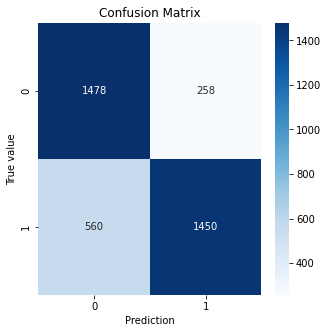

In [106]:
plot_confusion(confusion_matrix(y_test, y_pred_lr_pn))

### Count Vector

In [107]:
# Using fitted model_lr_cv to predict x_test
y_pred_lr_cv = model_lr_cv.predict(x_test_cv)

In [108]:
# Model Accuracy
print("LR Model Accuracy: {:.2%}".format(accuracy_score(y_test, y_pred_lr_cv)))

LR Model Accuracy: 88.84%


<module 'seaborn' from '/Users/thesumitshrestha/opt/anaconda3/lib/python3.9/site-packages/seaborn/__init__.py'>

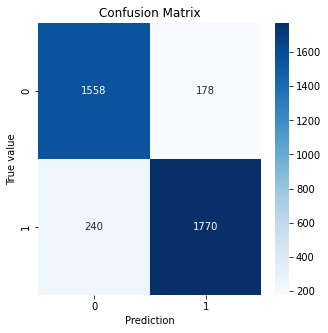

In [109]:
# Confusion Matrix
plot_confusion(confusion_matrix(y_test, y_pred_lr_cv))

### TF-IDF

In [110]:
# Using fitted model_lr_tf to predict x_test
y_pred_lr_tfidf = model_lr_tf.predict(x_test_tf)

In [111]:
# Model Accuracy
print("LR Model Accuracy: {:.2%}".format(accuracy_score(y_test, y_pred_lr_tfidf)))

LR Model Accuracy: 88.97%


<module 'seaborn' from '/Users/thesumitshrestha/opt/anaconda3/lib/python3.9/site-packages/seaborn/__init__.py'>

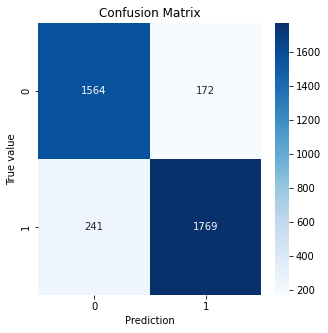

In [112]:
# Confusion Matrix
plot_confusion(confusion_matrix(y_test, y_pred_lr_tfidf))

# Predict tweet sentiment

In [113]:
# Function to Predict Tweet using tf-idf
def predict_tweet(tweet):
  processed_tweet = process_tweet(tweet)
  transformed_tweet = tf.transform([processed_tweet])
  prediction = model_lr_tf.predict(transformed_tweet)

  if prediction == 1:
    return "positive sentiment"
  else:
    return "negative sentiment"

In [114]:
# Importing tweets to validate
tweet_validation = pd.read_csv('twitter_validation.csv')
tweet_validation.head()

,Tweet
0,I mentioned on Facebook that I was struggling ...
1,BBC News - Amazon boss Jeff Bezos rejects clai...
2,@Microsoft Why do I pay for WORD when it funct...
3,"CSGO matchmaking is so full of closet hacking,..."
4,Now the President is slapping Americans in the...


In [115]:
# Dataframe to single list
tw_list = tweet_validation.stack().tolist()

In [116]:
# List result to single list
sentimented_list = []
for i in range(len(tw_list)):
    sentimented_list.append(predict_tweet(tw_list[i]))

In [117]:
# Creating DataFrame for better view of the result
tw_analysis = pd.DataFrame(tw_list, columns=['Tweet'])
tw_analysis.head()
tw_analysis['Tweet_Sentiment'] = pd.DataFrame(sentimented_list)

In [118]:
tw_analysis.head(50)

,Tweet,Tweet_Sentiment
0,I mentioned on Facebook that I was struggling ...,negative sentiment
1,BBC News - Amazon boss Jeff Bezos rejects clai...,negative sentiment
2,@Microsoft Why do I pay for WORD when it funct...,negative sentiment
3,"CSGO matchmaking is so full of closet hacking,...",negative sentiment
4,Now the President is slapping Americans in the...,positive sentiment
5,Hi @EAHelp I’ve had Madeleine McCann in my cel...,negative sentiment
6,Thank you @EAMaddenNFL!! \n\nNew TE Austin Hoo...,positive sentiment
7,"Rocket League, Sea of Thieves or Rainbow Six: ...",positive sentiment
8,my ass still knee-deep in Assassins Creed Odys...,positive sentiment
9,FIX IT JESUS ! Please FIX IT ! What In the wor...,negative sentiment
